In [8]:
import pandas as pd
import matplotlib as plt
data=pd.read_csv("GlobalLandTemperaturesByCity.csv")
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


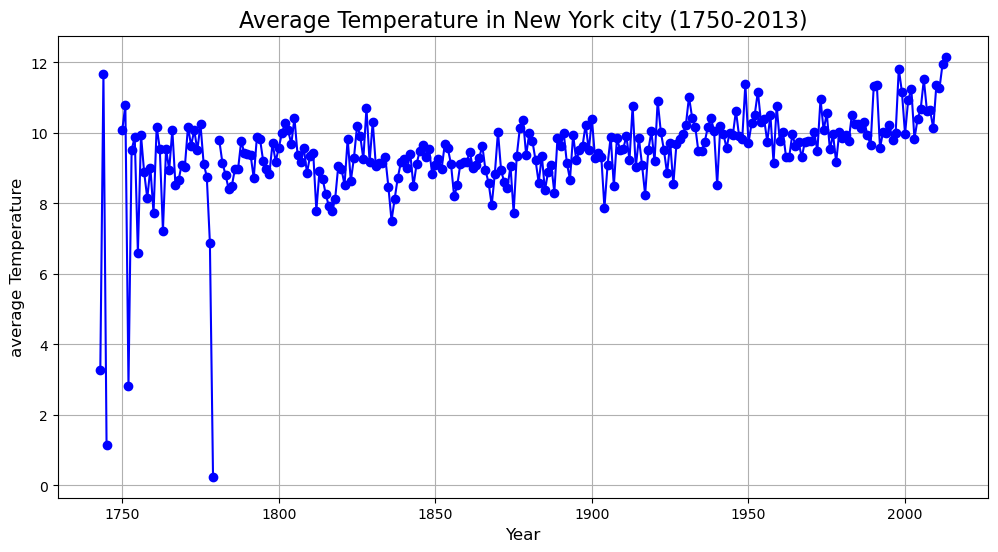

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("GlobalLandTemperaturesByCity.csv")
city_data=data[data['City']=='New York'].copy()
city_data['dt']=pd.to_datetime(city_data['dt'],errors='coerce')
city_data['Year']=city_data['dt'].dt.year
annual_avg_temp=city_data.groupby('Year')['AverageTemperature'].mean().reset_index()
plt.figure(figsize=(12,6))
plt.plot(annual_avg_temp['Year'],annual_avg_temp['AverageTemperature'],linestyle='-',color='blue',marker='o')
plt.title('Average Temperature in New York city (1750-2013)',fontsize=16)
plt.xlabel('Year',fontsize=12)
plt.ylabel('average Temperature',fontsize=12)
plt.grid(True)
plt.show()



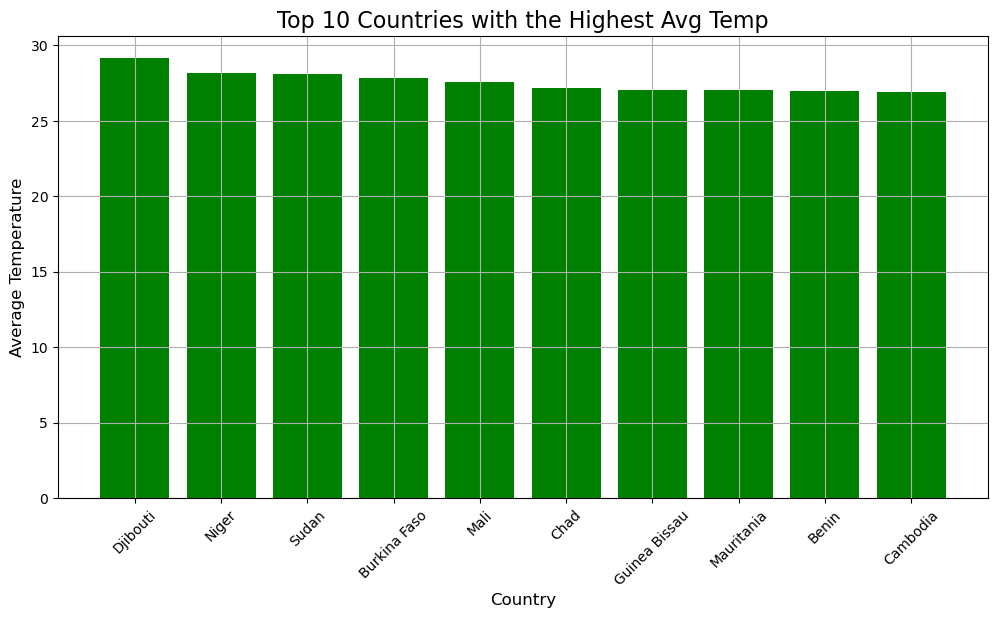

In [23]:
#Bar Plot
#highest Average Temperature in dataset

country_avg = data.groupby('Country')['AverageTemperature'].mean().reset_index()
country_avg = country_avg.dropna()
highest_countries = country_avg.sort_values(by='AverageTemperature', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(highest_countries['Country'], highest_countries['AverageTemperature'], color='green')
plt.title('Top 10 Countries with the Highest Avg Temp', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Temperature', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



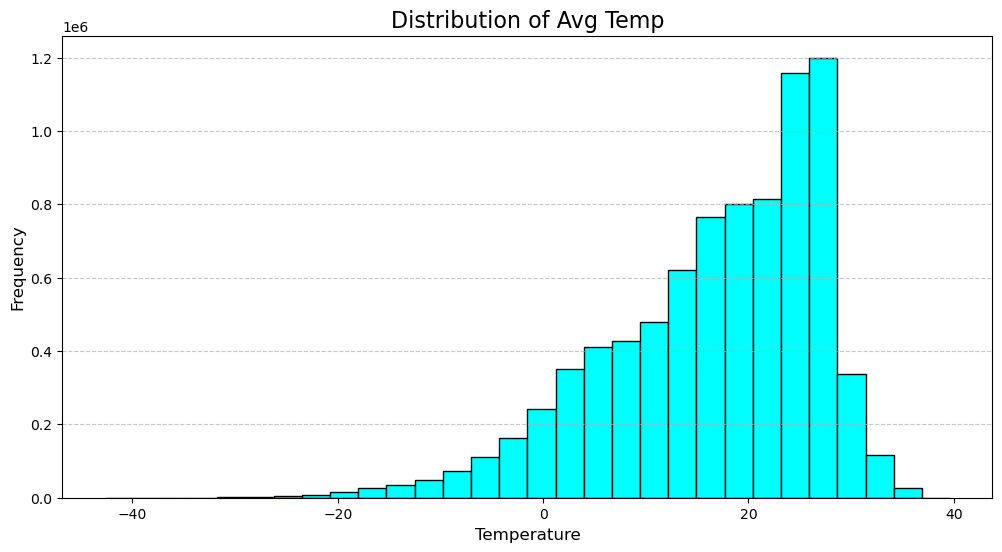

In [28]:
#histogram
#distribution of avg temperatures across all data

avg_distribution = data['AverageTemperature'].dropna()
plt.figure(figsize=(12, 6))
plt.hist(avg_distribution,color='cyan',edgecolor='black',bins=30)
plt.title('Distribution of Avg Temp', fontsize=16)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()


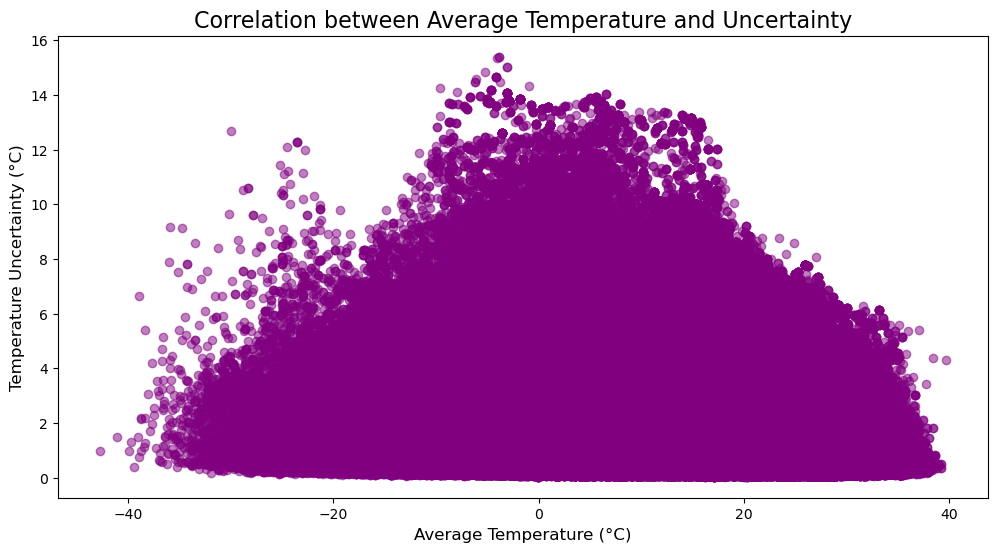

In [33]:
#Scatter Plot
#is there a correlation b/w temperature and uncertainity in the dataset
scatter_data = data.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
plt.figure(figsize=(12, 6))
plt.scatter(scatter_data['AverageTemperature'], scatter_data['AverageTemperatureUncertainty'], color='purple', alpha=0.5)
plt.title('Correlation between Average Temperature and Uncertainty', fontsize=16)
plt.xlabel('Average Temperature (°C)', fontsize=12)
plt.ylabel('Temperature Uncertainty (°C)', fontsize=12)
plt.show()



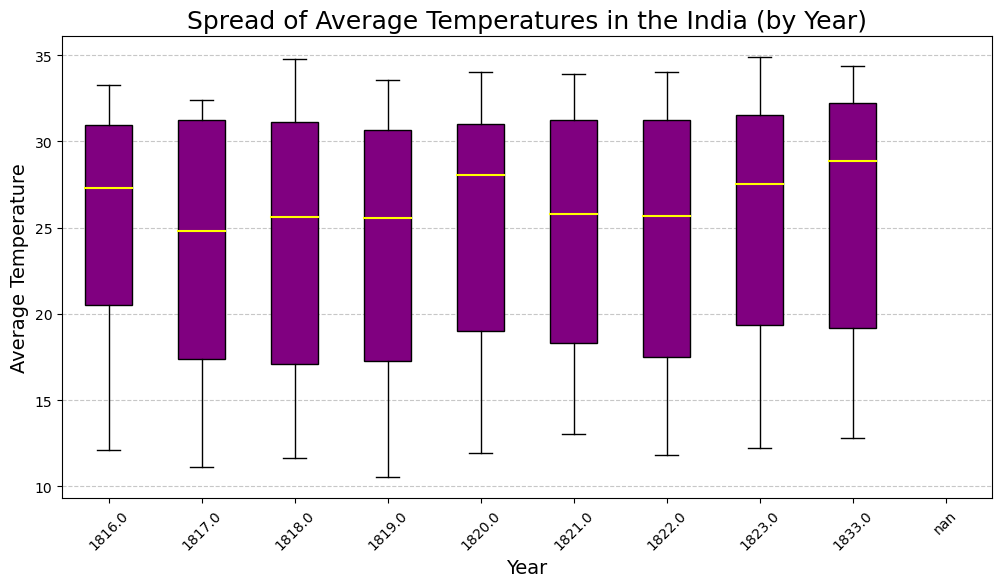

In [48]:
#box plot
#wt is the spread of temperature for a specific country over a given period
import matplotlib.pyplot as plt
country_data = data[data['Country'] == 'India'].dropna()
country_data['Year'] = pd.to_datetime(country_data['dt']).dt.year.head(100)
temperature_data = country_data[['Year', 'AverageTemperature']]
plt.figure(figsize=(12, 6))
plt.boxplot(
    [temperature_data[temperature_data['Year'] == year]['AverageTemperature'] for year in temperature_data['Year'].unique()],
    labels=temperature_data['Year'].unique(),
    patch_artist=True,
    boxprops=dict(facecolor='purple', color='black'),
    medianprops=dict(color='yellow', linewidth=1.5),
    flierprops=dict(marker='o', color='red', alpha=0.5),
)
plt.title('Spread of Average Temperatures in the India (by Year)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
